# Introduction
In this project, we're looking into the Covid19 dataset. This project aims to answer some of the interesting underlying questions about the data using machine learning algorithms as well as providing guidance for future exploration of the data.

## Project Content
I will cover the following topics:
- Installing the libraries
- Introduction to the Covid-19 Datasets
- Project Goals
- Data Cleaning
    - Subsetting data
    - Data preprocess
- Modeling
    - Feature Construction and Train-test split
    - Decision Tree Classifier
    - Logistic Regression Classifier
    - Stochastic gradient descent (SGD) Classifier
    - Predicting
- Conclusion and Further steps
    - Findings
    - Furture steps

# Installing the Libraries
This project uses the following libraries: [sklearn](https://scikit-learn.org/stable/) and [scipy](https://www.scipy.org/) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Introduction to the Covid-19 datasets



# Project Goals

In this project, the overall goal is to better understand the data. Especially, I'm interested in the following quesions: <br>
1. abc
<br> 2. a
<br> 3. a

In [2]:
states_df = pd.read_csv('us-states.csv')

In [237]:
states_df.head

<bound method NDFrame.head of             date          state  fips  cases  deaths
0     2020-01-21     Washington    53      1       0
1     2020-01-22     Washington    53      1       0
2     2020-01-23     Washington    53      1       0
3     2020-01-24       Illinois    17      1       0
4     2020-01-24     Washington    53      1       0
...          ...            ...   ...    ...     ...
5564  2020-06-11       Virginia    51  52647    1520
5565  2020-06-11     Washington    53  26172    1198
5566  2020-06-11  West Virginia    54   2217      86
5567  2020-06-11      Wisconsin    55  22049     685
5568  2020-06-11        Wyoming    56   1009      18

[5569 rows x 5 columns]>

In [238]:
#plot a trend plot to see how covid19 develops
#states with the most cases, highest death rates
states_df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [239]:
#First group by states
grouped = states_df.groupby('state')

In [240]:
grouped.get_group('Washington')

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
4,2020-01-24,Washington,53,1,0
7,2020-01-25,Washington,53,1,0
...,...,...,...,...,...
5345,2020-06-07,Washington,53,25064,1163
5400,2020-06-08,Washington,53,25593,1168
5455,2020-06-09,Washington,53,25796,1181
5510,2020-06-10,Washington,53,25940,1183


In [242]:
#grouped.groups

In [243]:
states_df.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

In [244]:
state_sum = grouped.max()
#state_sum

In [245]:
state_sum.nlargest(5, 'cases')

,date,fips,cases,deaths
state,,,,
New York,2020-06-11,36,385669,30431
New Jersey,2020-06-11,34,165816,12443
California,2020-06-11,6,143693,4941
Illinois,2020-06-11,17,131731,6388
Massachusetts,2020-06-11,25,104667,7492


In [246]:
state_sum.nlargest(5, 'deaths')

,date,fips,cases,deaths
state,,,,
New York,2020-06-11,36,385669,30431
New Jersey,2020-06-11,34,165816,12443
Massachusetts,2020-06-11,25,104667,7492
Illinois,2020-06-11,17,131731,6388
Pennsylvania,2020-06-11,42,81944,6187


In [263]:
#calculate the newest death rate for each state
death_rate_df = state_sum['deaths']/state_sum['cases']
death_rate_df.nlargest(5)

state
Connecticut       0.093250
Michigan          0.091197
Virgin Islands    0.083333
New York          0.078904
Pennsylvania      0.075503
dtype: float64

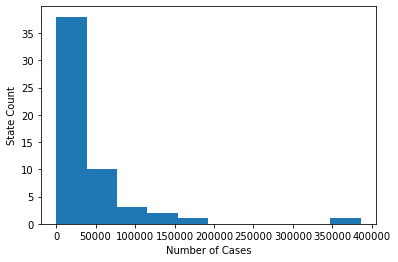

In [247]:
#plot histogram (50?) based on state total cases
%matplotlib inline

x = state_sum['cases']

#.get_level_values('cases')
plt.hist(x, density=False)  # `density=False` would make counts
plt.ylabel('State Count')
plt.xlabel('Number of Cases');

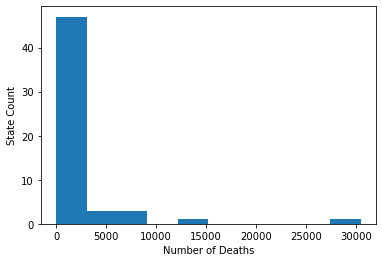

In [248]:
#plot histogram (50?) based on state total deaths
%matplotlib inline

x = state_sum['deaths']

#.get_level_values('cases')
plt.hist(x, density=False)  # `density=False` would make counts
plt.ylabel('State Count')
plt.xlabel('Number of Deaths');

In [249]:
#plot histogram based on state total deaths
Wash_data = state_sum.loc['Washington']
Wash_data
#Wash_data['cases']
#Wash_data['deaths']

date      2020-06-11
fips              53
cases          26172
deaths          1198
Name: Washington, dtype: object

In [250]:
#Function for plotting trends of cases and deaths

def plot_overall_trend(state_name, case_or_death):
    state_case_series = grouped.get_group(state_name)[case_or_death]
    time_duration = grouped.get_group(state_name)['date']

    time = pd.to_datetime(time_duration)
    #fig = plt.figure()
    fig, ax = plt.subplots()
    ax.plot(time, state_case_series)

    # rotate and align the tick labels so they look better
    fig.autofmt_xdate()

    # use a more precise date string for the x axis locations in the
    # toolbar
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.set_title('Overall trend of number of '+ case_or_death +' in ' + state_name + ' State')
    plt.xlabel('Time', fontsize = 12)
    plt.ylabel('Number of ' + case_or_death, fontsize = 12)
    #fig.savefig('test.jpg')
    return

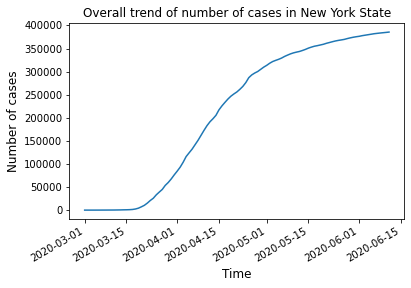

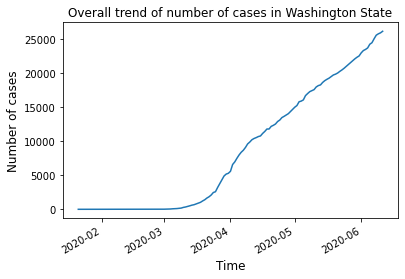

In [265]:
plot_overall_trend('New York', 'cases')
plot_overall_trend('Washington', 'cases')

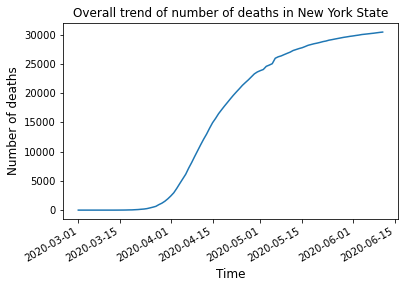

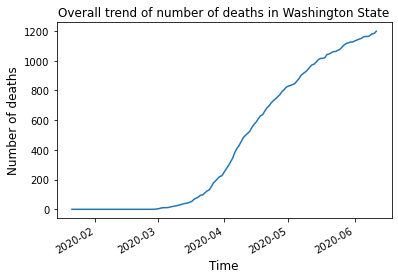

In [266]:
plot_overall_trend('New York', 'deaths')
plot_overall_trend('Washington', 'deaths')

In [253]:
#Function for plotting daily new cases and deaths

def plot_daily_trend(state_name, case_or_death):
    state_case_series = grouped.get_group(state_name)[case_or_death]

    daily_increases = state_case_series.diff()

    time_duration = grouped.get_group(state_name)['date']

    time = pd.to_datetime(time_duration)
    #fig = plt.figure()
    fig, ax = plt.subplots()
    ax.plot(time, daily_increases)

    # rotate and align the tick labels so they look better
    fig.autofmt_xdate()

    # use a more precise date string for the x axis locations in the
    # toolbar
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.set_title('Daily trend of new '+ case_or_death +' in ' + state_name + ' State')
    plt.xlabel('Time', fontsize = 12)
    plt.ylabel('Number of new daily' + case_or_death, fontsize = 12)
    #fig.savefig('test.jpg')
    return



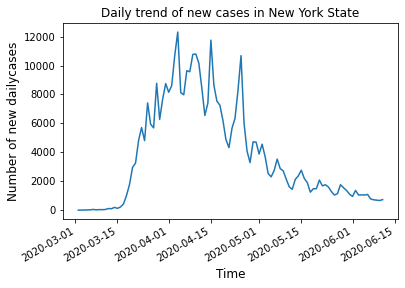

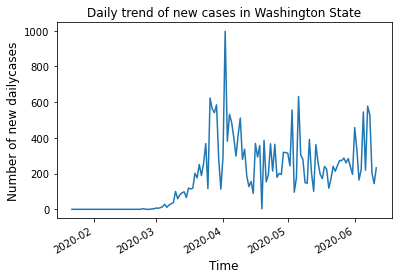

In [267]:
plot_daily_trend('New York', 'cases')
plot_daily_trend('Washington', 'cases')

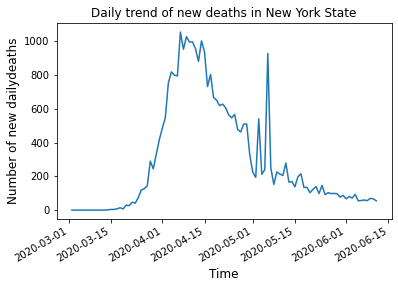

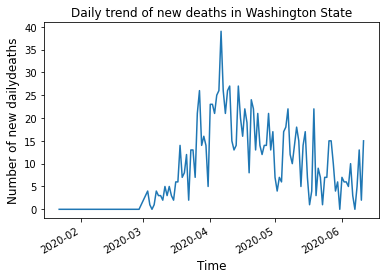

In [268]:
plot_daily_trend('New York', 'deaths')
plot_daily_trend('Washington', 'deaths')

In [262]:
#calculate the newest death rate for each state
death_rate_df = state_sum['deaths']/state_sum['cases']
death_rate_df.nlargest(5)

state
Connecticut       0.093250
Michigan          0.091197
Virgin Islands    0.083333
New York          0.078904
Pennsylvania      0.075503
dtype: float64

In [264]:
#quantile and death rate
death_rate_df.quantile


<bound method Series.quantile of state
Alabama                     0.033049
Alaska                      0.013514
Arizona                     0.035845
Arkansas                    0.015810
California                  0.034386
Colorado                    0.055288
Connecticut                 0.093250
Delaware                    0.040966
District of Columbia        0.052352
Florida                     0.041224
Georgia                     0.044657
Guam                        0.005208
Hawaii                      0.025000
Idaho                       0.026037
Illinois                    0.048493
Indiana                     0.059928
Iowa                        0.027745
Kansas                      0.022032
Kentucky                    0.042299
Louisiana                   0.066996
Maine                       0.037495
Maryland                    0.047268
Massachusetts               0.071579
Michigan                    0.091197
Minnesota                   0.043616
Mississippi                 0.046962

# Correlation

In [8]:
# Read influenza/pneumonia data and positive tests data
influenza_pneumonia_2018_df = pd.read_csv("influenza_pneumonia_2018.csv")
positive_tests_df = pd.read_csv("covid19_positive_tests.csv")
community_mobility_df = pd.read_csv("mobility_data.csv")
#states_policies_df = pd.read_csv("states_policies.csv")

# Combine these data sets with the states_df data set
comparison_data1 = pd.merge(influenza_pneumonia_2018_df, positive_tests_df, on = "state")
comparison_data2 = pd.merge(states_df, community_mobility_df, on = ['state', 'date'])
comparison_data = pd.merge(comparison_data1, comparison_data2, on = "state")


# Display the combined dataframe
comparison_data

,state,influenza_pneumonia_rate,influenza_pneumonia_deaths,number_tests_performed,positive_tests,positive_tests_range_min,positive_tests_range_max,date,fips,cases,deaths,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Alabama,21.4,1268,346963,11-20%,0.11,0.20,3/13/2020,1,6,0,7.0,32.0,26.0,7.0,-2.0,0.0
1,Alabama,21.4,1268,346963,11-20%,0.11,0.20,3/14/2020,1,12,0,1.0,28.0,55.0,12.0,4.0,0.0
2,Alabama,21.4,1268,346963,11-20%,0.11,0.20,3/15/2020,1,23,0,-7.0,16.0,16.0,6.0,-4.0,2.0
3,Alabama,21.4,1268,346963,11-20%,0.11,0.20,3/16/2020,1,29,0,-2.0,24.0,22.0,2.0,-10.0,4.0
4,Alabama,21.4,1268,346963,11-20%,0.11,0.20,3/17/2020,1,39,0,-11.0,17.0,25.0,-1.0,-17.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,Wyoming,18.9,128,42135,0-5%,0.00,0.05,6/3/2020,56,915,17,5.0,17.0,132.0,18.0,-24.0,6.0
4807,Wyoming,18.9,128,42135,0-5%,0.00,0.05,6/4/2020,56,921,17,5.0,22.0,146.0,22.0,-24.0,5.0
4808,Wyoming,18.9,128,42135,0-5%,0.00,0.05,6/5/2020,56,933,17,-1.0,18.0,176.0,28.0,-24.0,5.0
4809,Wyoming,18.9,128,42135,0-5%,0.00,0.05,6/6/2020,56,939,17,-7.0,12.0,135.0,27.0,-10.0,3.0


In [9]:
corr = comparison_data.corr(method="pearson")
corr

,influenza_pneumonia_rate,influenza_pneumonia_deaths,number_tests_performed,positive_tests_range_min,positive_tests_range_max,fips,cases,deaths,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
influenza_pneumonia_rate,1.000000,0.051747,-0.053731,-0.092605,-0.036212,0.007540,0.033142,0.045417,0.065213,0.105631,-0.057938,0.192188,0.062796,-0.053127
influenza_pneumonia_deaths,0.051747,1.000000,0.874434,0.307583,0.250737,-0.125784,0.446861,0.374970,-0.125777,-0.118384,-0.227302,-0.173673,-0.036550,0.087019
number_tests_performed,-0.053731,0.874434,1.000000,0.327729,0.293402,-0.110645,0.594140,0.534164,-0.170820,-0.156630,-0.235990,-0.259567,-0.069847,0.129127
positive_tests_range_min,-0.092605,0.307583,0.327729,1.000000,0.963545,-0.216558,0.298576,0.269891,-0.109496,-0.105935,-0.002629,-0.167521,-0.076183,0.134986
positive_tests_range_max,-0.036212,0.250737,0.293402,0.963545,1.000000,-0.189594,0.317524,0.296624,-0.126393,-0.121255,-0.012956,-0.183705,-0.092621,0.148700
fips,0.007540,-0.125784,-0.110645,-0.216558,-0.189594,1.000000,-0.007865,0.002991,0.029349,0.041170,0.106968,0.096678,0.018545,-0.027580
cases,0.033142,0.446861,0.594140,0.298576,0.317524,-0.007865,1.000000,0.979222,-0.235939,-0.161098,0.001084,-0.304519,-0.208759,0.208585
deaths,0.045417,0.374970,0.534164,0.269891,0.296624,0.002991,0.979222,1.000000,-0.210631,-0.138043,0.014454,-0.266034,-0.175303,0.177395
retail_and_recreation_percent_change_from_baseline,0.065213,-0.125777,-0.170820,-0.109496,-0.126393,0.029349,-0.235939,-0.210631,1.000000,0.820104,0.404193,0.849991,0.741095,-0.771390
grocery_and_pharmacy_percent_change_from_baseline,0.105631,-0.118384,-0.156630,-0.105935,-0.121255,0.041170,-0.161098,-0.138043,0.820104,1.000000,0.429153,0.787379,0.645249,-0.659348


In [ ]:
# high corelation between the number of influenza/pneumonia deaths and the number of tests performed
# high correlation between positive_tests_range_min and max (this actually has no real significance)
# strong correlation between the number of cases and the number of deaths (not surprising)